In [469]:
import pandas as pd
import numpy as np
import os
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import f1_score


In [470]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [471]:
PATH = "data/"
sz=310

# Make folder structure and move files for validation set. 

In [472]:
#VALID_PATH = "data/valid/"
#TRAIN_PATH = "data/train/"
#if not os.path.isdir(VALID_PATH):
        #os.mkdir(VALID_PATH)
#for dirpath, dirnames, filenames in os.walk(TRAIN_PATH):
    #if len(dirnames) > 0:
        #for folder in dirnames:
            #if not os.path.isdir(os.path.join(VALID_PATH, folder)):
                #os.mkdir(os.path.join(VALID_PATH, folder))
            #onlyfiles = os.listdir(os.path.join(TRAIN_PATH, folder))
            #k = len(onlyfiles) * 0.15
            #indicies = random.sample(range(len(onlyfiles)), int(k))
            #for i in indicies:
                #shutil.move(os.path.join(TRAIN_PATH+folder,onlyfiles[i]), os.path.join(VALID_PATH+folder, onlyfiles[i]))
            
    


# Choosing architecture

tried VGG16, resnet32, resnet50, resnet101, resnet 152

Current best accuracy is resnet101 with 92%̈́

best image size found is 300 (Most images is 300)

In [485]:
arch=resnet101
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.2),
                                     bs=64, num_workers=4, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)



100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▊  | 59/75 [00:00<00:00, 77.07it/s, loss=11.8]


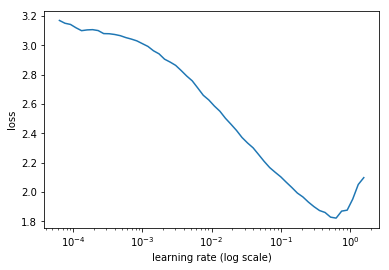

In [486]:
lrf=learn.lr_find()
learn.sched.plot()
lr = 0.0012

In [487]:

learn.fit(lr, 3, cycle_len=2, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=26), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.734184   1.108027   0.5       
    1      1.336876   1.036731   0.583333                 
    2      1.085717   0.802221   0.666667                  
    3      0.880731   0.630028   0.833333                  
    4      0.760237   0.547815   0.833333                  
    5      0.66519    0.545897   0.75                      
    6      0.615337   0.502119   0.916667                  
    7      0.615668   0.516605   0.916667                  
    8      0.631571   0.536281   0.833333                  
    9      0.567834   0.518022   0.833333                  
    10     0.51728    0.490785   0.833333                  
    11     0.488103   0.510239   0.75                      
    12     0.511201   0.418465   0.833333                  
    13     0.460969   0.439911   0.833333                   
    14     0.438539   0.422564   0.833333                  
    15     0.506504   0.375409   0.916667                

[0.35972014, 0.9166666865348816]

In [488]:
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.353447   0.349741   0.916667  
    1      0.354757   0.360316   0.916667                  
    2      0.4089     0.369569   0.916667                   
    3      0.385019   0.360246   0.833333                  
    4      0.374761   0.350002   0.833333                  
    5      0.355939   0.421188   0.833333                  
    6      0.332798   0.416233   0.833333                  
    7      0.39279    0.395908   0.916667                  
    8      0.355537   0.379085   0.916667                  
    9      0.328036   0.355148   0.916667                  
    10     0.324803   0.345653   0.916667                  
    11     0.321889   0.339694   0.916667                   
    12     0.310424   0.338593   0.916667                  
    13     0.280151   0.326914   0.916667                  



[0.32691428, 0.9166666865348816]

In [489]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.278268   0.346861   0.916667  
    1      0.273894   0.326818   0.916667                  
    2      0.295289   0.378101   0.916667                  



[0.37810096, 0.9166666865348816]

In [490]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.355838   0.34455    0.833333  
    1      0.271048   0.335076   0.916667                   
    2      0.262211   0.308121   0.916667                   
    3      0.284916   0.440596   0.916667                  
    4      0.25305    0.375409   0.833333                  
    5      0.301297   0.427245   0.916667                  
    6      0.272088   0.381123   0.916667                  



[0.38112307, 0.9166666865348816]

In [491]:
learn.predict()


array([[ -0.50703,  -9.62047,  -9.7885 , -10.8043 ,  -5.13378,  -8.70411,  -0.96031,  -6.78449,  -5.64705,
         -8.09389,  -5.94115,  -6.76653],
       [-11.67377,  -0.00202,  -9.54154, -11.83153,  -8.23191,  -8.05068, -13.03785,  -7.05836, -11.29282,
         -8.70158,  -8.14169, -11.21618],
       [ -3.26575,  -1.93596,  -1.00048,  -5.43701,  -2.68644,  -1.38909,  -4.01426,  -5.79544,  -2.63072,
         -3.92498,  -4.77996,  -4.99042],
       [ -6.21484,  -6.53791,  -6.92738,  -0.12409,  -4.15664,  -4.49439,  -6.23655,  -4.59467,  -3.14088,
         -6.50126,  -5.55842,  -3.698  ],
       [ -7.18461, -13.4243 , -13.87428, -18.83069,  -0.0013 , -10.87988, -10.32395, -10.44839, -15.88813,
        -16.72002, -16.56867,  -7.70058],
       [-10.10517,  -7.41329,  -7.26855,  -9.40496,  -5.38397,  -0.00863, -10.48697,  -6.54214, -12.83856,
        -10.64195,  -8.60322,  -7.01016],
       [ -3.40116, -10.22022,  -8.4915 , -12.38824,  -8.02144,  -7.52697,  -0.03521, -11.03778,  -9.65305,

In [492]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [493]:
log_preds_test = learn.predict(is_test=True)

In [494]:


log_preds_test = np.argmax(log_preds_test, axis=1)
preds_classes = [data.classes[i].replace("_", " ") for i in log_preds_test]
probs = np.exp(log_preds_test)

submission = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': preds_classes})
submission.head()

,file,species
0,aaf4da98f.png,Sugar beet
1,77ccb8b2a.png,Small-flowered Cranesbill
2,592473c83.png,Loose Silky-bent
3,974959ec1.png,Common wheat
4,060f1dc84.png,Shepherds Purse


In [495]:
submission.to_csv('submission2.csv', index=False)

In [496]:
len(submission)

794